# ROIs

Extract mean FA from ROIs

In [181]:
%%bash

tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya
cd ${tbss_dir}/roi
fslmaths /usr/local/fsl/data/atlases/JHU/JHU-ICBM-labels-1mm.nii.gz -thr 3 -uthr 5 ${tbss_dir}/roi/cc.nii.gz
fslmaths /usr/local/fsl/data/atlases/JHU/JHU-ICBM-labels-1mm.nii.gz -thr 3 -uthr 3 ${tbss_dir}/roi/genu.nii.gz

tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa
cd ${tbss_dir}/roi
fslmaths /usr/local/fsl/data/atlases/JHU/JHU-ICBM-labels-1mm.nii.gz -thr 3 -uthr 5 ${tbss_dir}/roi/cc.nii.gz
fslmaths /usr/local/fsl/data/atlases/JHU/JHU-ICBM-labels-1mm.nii.gz -thr 3 -uthr 3 ${tbss_dir}/roi/genu.nii.gz



In [ ]:
%%bash
# cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats
# for mask in `ls ../../roi`; do
# fslmeants -i all_FA_skeletonised -m ${mask} -o ${mask}-meants.txt
# done

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats
for mask in `ls ../../roi`; do
echo `fslmeants -i all_FA_skeletonised -m ${mask} -o ${mask}"-meants".txt`
done


## Creating ROIs from coordinates

[Andy's Brain Blog](http://andysbrainblog.blogspot.com/2013/04/fsl-tutorial-creating-rois-from.html)

In [2]:
%%bash

fslmaths -h


Usage: fslmaths [-dt <datatype>] <first_input> [operations and inputs] <output> [-odt <datatype>]

Datatype information:
 -dt sets the datatype used internally for calculations (default float for all except double images)
 -odt sets the output datatype ( default is float )
 Possible datatypes are: char short int float double input
 "input" will set the datatype to that of the original image

Binary operations:
  (some inputs can be either an image or a number)
 -add   : add following input to current image
 -sub   : subtract following input from current image
 -mul   : multiply current image by following input
 -div   : divide current image by following input
 -rem   : modulus remainder - divide current image by following input and take remainder
 -mas   : use (following image>0) to mask current image
 -thr   : use following number to threshold current image (zero anything below the number)
 -thrp  : use following percentage (0-100) of ROBUST RANGE to threshold current image (zero any

`-roi <xmin> <xsize> <ymin> <ysize> <zmin> <zsize> <tmin> <tsize> : zero outside roi (using voxel coordinates). Inputting -1 for a size will set it to the full image extent for that dimension.`

In [5]:
%%bash

ls $FSLDIR/data/standard

FMRIB58_FA-skeleton_1mm.nii.gz
FMRIB58_FA_1mm.nii.gz
FSL_HCP1065_FA_1mm.nii.gz
FSL_HCP1065_L1_1mm.nii.gz
FSL_HCP1065_L2_1mm.nii.gz
FSL_HCP1065_L3_1mm.nii.gz
FSL_HCP1065_MD_1mm.nii.gz
FSL_HCP1065_MO_1mm.nii.gz
FSL_HCP1065_V1_1mm.nii.gz
FSL_HCP1065_V2_1mm.nii.gz
FSL_HCP1065_V3_1mm.nii.gz
FSL_HCP1065_tensor_1mm.nii.gz
Fornix_FMRIB_FA1mm.nii.gz
LowerCingulum_1mm.nii.gz
MNI152_T1_0.5mm.nii.gz
MNI152_T1_1mm.nii.gz
MNI152_T1_1mm_BigFoV_facemask.nii.gz
MNI152_T1_1mm_Hipp_mask_dil8.nii.gz
MNI152_T1_1mm_brain.nii.gz
MNI152_T1_1mm_brain_mask.nii.gz
MNI152_T1_1mm_brain_mask_dil.nii.gz
MNI152_T1_1mm_first_brain_mask.nii.gz
MNI152_T1_2mm.nii.gz
MNI152_T1_2mm_LR-masked.nii.gz
MNI152_T1_2mm_VentricleMask.nii.gz
MNI152_T1_2mm_b0.nii.gz
MNI152_T1_2mm_brain.nii.gz
MNI152_T1_2mm_brain_mask.nii.gz
MNI152_T1_2mm_brain_mask_deweight_eyes.nii.gz
MNI152_T1_2mm_brain_mask_dil.nii.gz
MNI152_T1_2mm_brain_mask_dil1.nii.gz
MNI152_T1_2mm_edges.nii.gz
MNI152_T1_2mm_eye_mask.nii.gz
MNI152_T1_2mm_skull.nii.gz
MNI152_T1

## Selected ROIs

1. Frontal forceps (23 32 4) --> 67/113 158 76
2. Posterior forceps (34 51 0) --> 56/124 177 72
3. Longitudinal fasciculus (19 -18 37 --> 78/102 108 109; -21 -13 23 --> 111/69 113 95)
4. YA cluster (36 -11 28) --> 54/126 115 100
5. Corpus callosum

[Thresholding](https://www.jiscmail.ac.uk/cgi-bin/webadmin?A2=fsl;27fa5348.1409)

In [5]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/roi/

fslmaths $FSLDIR/data/standard/MNI152_T1_1mm_brain_mask.nii.gz -roi 67 1 158 1 76 1 0 1 FFpoint_R -odt float
fslmaths FFpoint_R -kernel sphere 6 -fmean -thr 0.001 -bin FFsphere_R -odt float
fslmaths $FSLDIR/data/standard/MNI152_T1_1mm_brain_mask.nii.gz -roi 113 1 158 1 76 1 0 1 FFpoint_L -odt float
fslmaths FFpoint_L -kernel sphere 6 -fmean -thr 0.001 -bin FFsphere_L -odt float


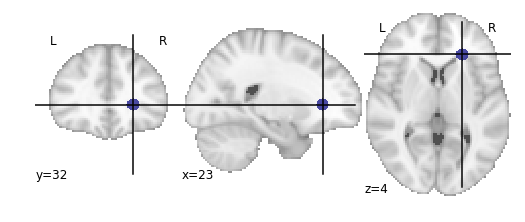

In [7]:
from nilearn import plotting

plotting.plot_roi('/Volumes/G-DRIVE mobile/derivatives/roi/FFsphere_R.nii.gz')

In [6]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/roi/

fslmaths $FSLDIR/data/standard/MNI152_T1_1mm_brain_mask.nii.gz -roi 56 1 177 1 72 1 0 1 PFpoint_R -odt float
fslmaths PFpoint_R -kernel sphere 6 -fmean -thr 0.001 -bin PFsphere_R -odt float
fslmaths $FSLDIR/data/standard/MNI152_T1_1mm_brain_mask.nii.gz -roi 124 1 177 1 72 1 0 1 PFpoint_L -odt float
fslmaths PFpoint_L -kernel sphere 6 -fmean -thr 0.001 -bin PFsphere_L -odt float


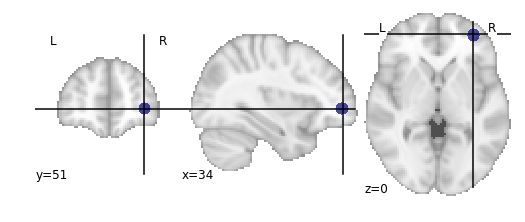

In [8]:
from nilearn import plotting

plotting.plot_roi('/Volumes/G-DRIVE mobile/derivatives/roi/PFsphere_R.nii.gz')

In [9]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/roi/

fslmaths $FSLDIR/data/standard/MNI152_T1_1mm_brain_mask.nii.gz -roi 78 1 108 1 109 1 0 1 LFpoint1_R -odt float
fslmaths LFpoint1_R -kernel sphere 6 -fmean -thr 0.001 -bin LFsphere1_R -odt float
fslmaths $FSLDIR/data/standard/MNI152_T1_1mm_brain_mask.nii.gz -roi 102 1 108 1 109 1 0 1 LFpoint1_L -odt float
fslmaths LFpoint1_L -kernel sphere 6 -fmean -thr 0.001 -bin LFsphere1_L -odt float
fslmaths $FSLDIR/data/standard/MNI152_T1_1mm_brain_mask.nii.gz -roi 69 1 113 1 95 1 0 1 LFpoint2_R -odt float
fslmaths LFpoint2_R -kernel sphere 6 -fmean -thr 0.001 -bin LFsphere2_R -odt float
fslmaths $FSLDIR/data/standard/MNI152_T1_1mm_brain_mask.nii.gz -roi 111 1 113 1 95 1 0 1 LFpoint2_L -odt float
fslmaths LFpoint2_L -kernel sphere 6 -fmean -thr 0.001 -bin LFsphere2_L -odt float


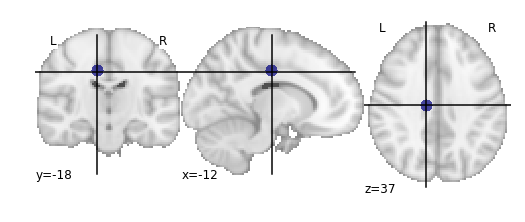

In [10]:
from nilearn import plotting

plotting.plot_roi('/Volumes/G-DRIVE mobile/derivatives/roi/LFsphere1_L.nii.gz')

In [103]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/roi
mkdir stats

for i in `ls *sphere*`; do
echo $i
outfile="`echo ${i##*/.nii.gz} | cut -d. -f1`"

echo "fslstats ../tbss_oa/stats/tbss_oa_amp7_jhu_tstat1.nii.gz -k $i -M >> stats/${outfile}_oa_tstat_means.txt;"
fslstats ../tbss_oa/stats/tbss_oa_amp7_jhu_tstat1.nii.gz -k $i -M >> stats/${outfile}_oa_tstat_means.txt;

echo "fslstats ../tbss_ya/stats/tbss_ya_amp7_jhu_tstat1.nii.gz -k $i -M >> stats/${outfile}_ya_tstat_means.txt;"
fslstats ../tbss_ya/stats/tbss_ya_amp7_jhu_tstat1.nii.gz -k $i -M >> stats/${outfile}_ya_tstat_means.txt;
done


FFsphere_L.nii.gz
fslstats ../tbss_oa/stats/tbss_oa_amp7_jhu_tstat1.nii.gz -k FFsphere_L.nii.gz -M >> stats/FFsphere_L_oa_tstat_means.txt;
fslstats ../tbss_ya/stats/tbss_ya_amp7_jhu_tstat1.nii.gz -k FFsphere_L.nii.gz -M >> stats/FFsphere_L_ya_tstat_means.txt;
FFsphere_R.nii.gz
fslstats ../tbss_oa/stats/tbss_oa_amp7_jhu_tstat1.nii.gz -k FFsphere_R.nii.gz -M >> stats/FFsphere_R_oa_tstat_means.txt;
fslstats ../tbss_ya/stats/tbss_ya_amp7_jhu_tstat1.nii.gz -k FFsphere_R.nii.gz -M >> stats/FFsphere_R_ya_tstat_means.txt;
LFsphere1_L.nii.gz
fslstats ../tbss_oa/stats/tbss_oa_amp7_jhu_tstat1.nii.gz -k LFsphere1_L.nii.gz -M >> stats/LFsphere1_L_oa_tstat_means.txt;
fslstats ../tbss_ya/stats/tbss_ya_amp7_jhu_tstat1.nii.gz -k LFsphere1_L.nii.gz -M >> stats/LFsphere1_L_ya_tstat_means.txt;
LFsphere1_R.nii.gz
fslstats ../tbss_oa/stats/tbss_oa_amp7_jhu_tstat1.nii.gz -k LFsphere1_R.nii.gz -M >> stats/LFsphere1_R_oa_tstat_means.txt;
fslstats ../tbss_ya/stats/tbss_ya_amp7_jhu_tstat1.nii.gz -k LFsphere1_R.n

mkdir: stats: File exists
ERROR:: Empty mask image
ERROR:: Empty mask image
ERROR:: Empty mask image
ERROR:: Empty mask image


In [109]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/roi
mkdir stats

for i in `ls *sphere*`; do
echo $i
outfile="`echo ${i##*/.nii.gz} | cut -d. -f1`"

echo "fslmeants -i ../tbss_oa/stats/all_FA.nii.gz -m $i -o stats/${outfile}_oa_fa_means.txt;"
fslmeants -i ../tbss_oa/stats/all_FA.nii.gz -m $i -o stats/${outfile}_oa_fa_means.txt;

echo "fslmeants -i ../tbss_ya/stats/all_FA.nii.gz -m $i -o stats/${outfile}_ya_fa_means.txt;"
fslmeants -i ../tbss_ya/stats/all_FA.nii.gz -m $i -o stats/${outfile}_ya_fa_means.txt;
done

FFsphere_L.nii.gz
fslmeants -i ../tbss_oa/stats/all_FA.nii.gz -m FFsphere_L.nii.gz -o stats/FFsphere_L_oa_fa_means.txt;
fslmeants -i ../tbss_ya/stats/all_FA.nii.gz -m FFsphere_L.nii.gz -o stats/FFsphere_L_ya_fa_means.txt;
FFsphere_R.nii.gz
fslmeants -i ../tbss_oa/stats/all_FA.nii.gz -m FFsphere_R.nii.gz -o stats/FFsphere_R_oa_fa_means.txt;
fslmeants -i ../tbss_ya/stats/all_FA.nii.gz -m FFsphere_R.nii.gz -o stats/FFsphere_R_ya_fa_means.txt;
LFsphere1_L.nii.gz
fslmeants -i ../tbss_oa/stats/all_FA.nii.gz -m LFsphere1_L.nii.gz -o stats/LFsphere1_L_oa_fa_means.txt;
fslmeants -i ../tbss_ya/stats/all_FA.nii.gz -m LFsphere1_L.nii.gz -o stats/LFsphere1_L_ya_fa_means.txt;
LFsphere1_R.nii.gz
fslmeants -i ../tbss_oa/stats/all_FA.nii.gz -m LFsphere1_R.nii.gz -o stats/LFsphere1_R_oa_fa_means.txt;
fslmeants -i ../tbss_ya/stats/all_FA.nii.gz -m LFsphere1_R.nii.gz -o stats/LFsphere1_R_ya_fa_means.txt;
LFsphere2_L.nii.gz
fslmeants -i ../tbss_oa/stats/all_FA.nii.gz -m LFsphere2_L.nii.gz -o stats/LFsphere

mkdir: stats: File exists


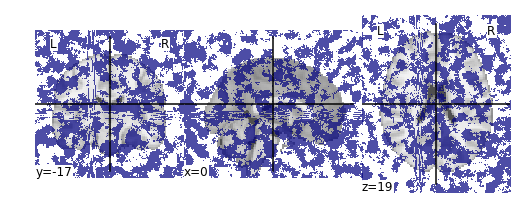

In [3]:
from nilearn import plotting

plotting.plot_roi('/Volumes/G-DRIVE mobile/derivatives/roi/FFsphere1.nii.gz')